In [2]:
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

/Volumes/BigBox/Python/anaconda3/envs/my_project_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_country']  == 'United States') & (df['job_title_short'] == 'Data Analyst')]

In [6]:
df_DA_US.dropna(subset = ['salary_year_avg'], inplace=True)

/var/folders/9s/gf5r5sm16hg7qm1m86byhk9w0000gn/T/ipykernel_12851/771632673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_US.dropna(subset = ['salary_year_avg'], inplace=True)


In [7]:
df_DA_US_skills = df_DA_US.explode('job_skills')

In [12]:
df_median_skill_salary =  df_DA_US_skills.groupby('job_skills')['salary_year_avg'].median().reset_index(name='median_salary')

In [20]:
df_skills_percent = df_DA_US_skills['job_skills'].value_counts().reset_index(name='skill_count')

In [19]:
total_jobs = df_DA_US['job_title_short'].value_counts().sum()

In [25]:
df_skills_percent['skill_percent'] = df_skills_percent['skill_count'].div(total_jobs/100)

In [42]:
final_df = df_skills_percent.merge(df_median_skill_salary)

In [45]:
final_df = final_df.head(12)

In [46]:
final_df

,job_skills,skill_count,skill_percent,median_salary
0,sql,2508,57.655172,91000.00
1,excel,1808,41.563218,84392.00
2,python,1431,32.896552,97500.00
3,tableau,1364,31.356322,92875.00
4,sas,926,21.287356,90000.00
5,r,893,20.528736,92500.00
6,power bi,838,19.264368,90000.00
7,powerpoint,462,10.620690,85000.00
8,word,461,10.597701,81194.75
9,sql server,286,6.574713,92500.00


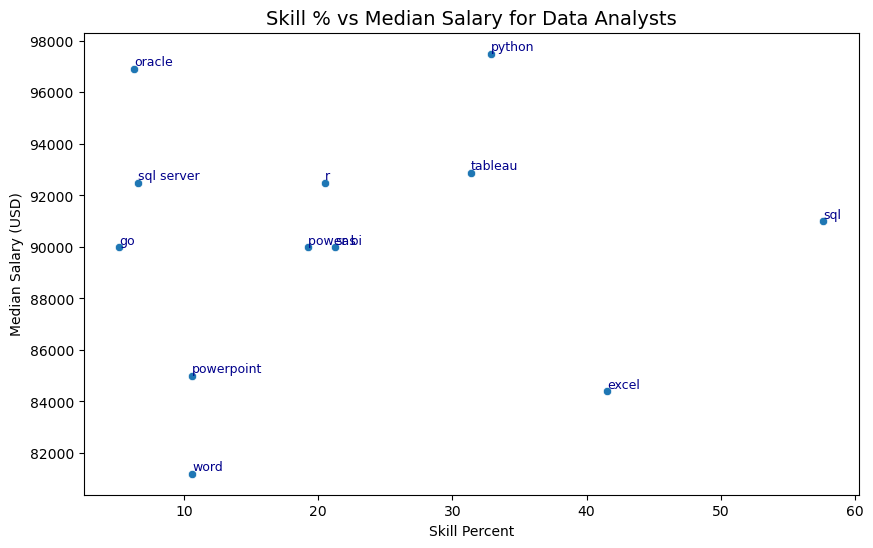

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=final_df,
    x='skill_percent',
    y='median_salary',
    ax=ax
)

# Подписываем каждую точку
for i, row in final_df.iterrows():
    ax.text(
        row['skill_percent'],       # X-координата
        row['median_salary'],       # Y-координата
        row['job_skills'],          # подпись
        fontsize=9, color="darkblue", ha="left", va="bottom"
    )

ax.set_title("Skill % vs Median Salary for Data Analysts", fontsize=14)
ax.set_xlabel("Skill Percent")
ax.set_ylabel("Median Salary (USD)")

plt.show()

In [ ]:
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

df_DA_US = df[(df['job_country']  == 'United States') & (df['job_title_short'] == 'Data Analyst')]

df_DA_US.dropna(subset = ['salary_year_avg'], inplace=True)

df_DA_US_skills = df_DA_US.explode('job_skills')
df_median_skill_salary =  df_DA_US_skills.groupby('job_skills')['salary_year_avg'].median().reset_index(name='median_salary')

df_skills_percent = df_DA_US_skills['job_skills'].value_counts().reset_index(name='skill_count')

total_jobs = df_DA_US['job_title_short'].value_counts().sum()

df_skills_percent['skill_percent'] = df_skills_percent['skill_count'].div(total_jobs/100)

final_df = df_skills_percent.merge(df_median_skill_salary)

final_df = final_df.head(12)

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=final_df,
    x='skill_percent',
    y='median_salary',
    ax=ax
)

# Подписываем каждую точку
for i, row in final_df.iterrows():
    ax.text(
        row['skill_percent'],       # X-координата
        row['median_salary'],       # Y-координата
        row['job_skills'],          # подпись
        fontsize=9, color="darkblue", ha="left", va="bottom"
    )

ax.set_title("Skill % vs Median Salary for Data Analysts", fontsize=14)
ax.set_xlabel("Skill Percent")
ax.set_ylabel("Median Salary (USD)")

plt.show()

<generator object DataFrame.iterrows at 0x317a9d580>